In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install folium
import folium # plotting library
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
!pip install seaborn
import seaborn as sns


In [24]:
df_gemeinden = pd.read_csv('./Daten/Gemeinde inkl. geo.csv')

In [25]:
df_gemeinden.head()

,Gemeindename,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,GLP,BDP,PdA/Sol.,GPS,Kleine Rechtsparteien,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N
0,Kammersrohr,2549,32,-17.948718,33.684211,3.125000,12.500000,62.500000,25.000000,0.000000,...,10.185185,0.925926,not available,7.407407,11.111111,SO,2611701.146,1233572.044,47.252957,7.593204
1,Bister,6172,33,0.000000,5.679862,6.060606,9.090909,60.606061,30.303030,0.000000,...,3.289474,0.925926,not available,10.526316,11.111111,VS,2648289.945,1134692.620,46.361879,8.066106
2,Schelten,708,35,-14.634146,6.294964,5.714286,17.142857,65.714286,17.142857,28.169014,...,5.882353,0.000000,0.4901960784,30.882353,0.000000,BE,2608514.796,1242354.134,47.331996,7.551276
3,Berken,972,41,-16.326531,29.496403,2.439024,2.439024,65.853659,31.707317,0.000000,...,4.315476,7.291667,0.0,0.595238,0.000000,BE,2620245.695,1230572.848,47.225775,7.705946
4,Rebévelier,715,42,-10.638298,11.830986,2.380952,26.190476,47.619048,26.190476,24.096386,...,0.000000,0.320513,3.5256410256,8.493590,3.525641,BE,2581390.049,1237837.181,47.291158,7.192605


In [26]:
# Farbgruppe hinterlegen
out_lst_grpType = df_gemeinden.Gemeindename.unique()
out_df_grpType = pd.DataFrame(out_lst_grpType) 
out_df_grpType = out_df_grpType.rename(columns={0: "Gemeindename"})
out_df_grpType['colorGrp'] = out_df_grpType.apply(lambda x : list(np.random.choice(range(256), size=3)), axis=1)

In [27]:
df_gemeinden.head()


,Gemeindename,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,GLP,BDP,PdA/Sol.,GPS,Kleine Rechtsparteien,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N
0,Kammersrohr,2549,32,-17.948718,33.684211,3.125000,12.500000,62.500000,25.000000,0.000000,...,10.185185,0.925926,not available,7.407407,11.111111,SO,2611701.146,1233572.044,47.252957,7.593204
1,Bister,6172,33,0.000000,5.679862,6.060606,9.090909,60.606061,30.303030,0.000000,...,3.289474,0.925926,not available,10.526316,11.111111,VS,2648289.945,1134692.620,46.361879,8.066106
2,Schelten,708,35,-14.634146,6.294964,5.714286,17.142857,65.714286,17.142857,28.169014,...,5.882353,0.000000,0.4901960784,30.882353,0.000000,BE,2608514.796,1242354.134,47.331996,7.551276
3,Berken,972,41,-16.326531,29.496403,2.439024,2.439024,65.853659,31.707317,0.000000,...,4.315476,7.291667,0.0,0.595238,0.000000,BE,2620245.695,1230572.848,47.225775,7.705946
4,Rebévelier,715,42,-10.638298,11.830986,2.380952,26.190476,47.619048,26.190476,24.096386,...,0.000000,0.320513,3.5256410256,8.493590,3.525641,BE,2581390.049,1237837.181,47.291158,7.192605


In [28]:
out_df_grpType.sort_values(by='Gemeindename').head()

,Gemeindename,colorGrp
1957,Aadorf,"[133, 202, 52]"
2101,Aarau,"[164, 52, 96]"
1704,Aarberg,"[224, 70, 21]"
1930,Aarburg,"[3, 78, 236]"
1700,Aarwangen,"[21, 10, 181]"


In [29]:
df_gemeinden = pd.merge(df_gemeinden, out_df_grpType, on='Gemeindename')

In [30]:
df_gemeinden.head()

,Gemeindename,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,BDP,PdA/Sol.,GPS,Kleine Rechtsparteien,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N,colorGrp
0,Kammersrohr,2549,32,-17.948718,33.684211,3.125000,12.500000,62.500000,25.000000,0.000000,...,0.925926,not available,7.407407,11.111111,SO,2611701.146,1233572.044,47.252957,7.593204,"[155, 92, 101]"
1,Bister,6172,33,0.000000,5.679862,6.060606,9.090909,60.606061,30.303030,0.000000,...,0.925926,not available,10.526316,11.111111,VS,2648289.945,1134692.620,46.361879,8.066106,"[29, 151, 220]"
2,Schelten,708,35,-14.634146,6.294964,5.714286,17.142857,65.714286,17.142857,28.169014,...,0.000000,0.4901960784,30.882353,0.000000,BE,2608514.796,1242354.134,47.331996,7.551276,"[132, 249, 189]"
3,Berken,972,41,-16.326531,29.496403,2.439024,2.439024,65.853659,31.707317,0.000000,...,7.291667,0.0,0.595238,0.000000,BE,2620245.695,1230572.848,47.225775,7.705946,"[194, 39, 96]"
4,Rebévelier,715,42,-10.638298,11.830986,2.380952,26.190476,47.619048,26.190476,24.096386,...,0.320513,3.5256410256,8.493590,3.525641,BE,2581390.049,1237837.181,47.291158,7.192605,"[30, 148, 114]"


In [31]:
latitude = 46.80446
longitude = 8.22467

In [32]:
map_markets = folium.Map(location=[latitude, longitude], zoom_start=8)

for lat, lng, location, colo in zip(df_gemeinden['WGS84_E'], df_gemeinden['WGS84_N'], df_gemeinden['Gemeindename'], df_gemeinden['colorGrp']):
            label = '{}, {};{}'.format(location, lat, lng)
            label = folium.Popup(label, parse_html=True) #Popup zur Darstellung Text in der Map
            folium.CircleMarker(
                [lat, lng],
                radius=3,
                popup=label,
                color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill=True,
                fill_color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets) 
        
map_markets

In [33]:
df_gemeinden_65 = df_gemeinden[df_gemeinden['65 Jahre und mehr']>25]

In [34]:
df_gemeinden_65.shape

(197, 49)

In [89]:
#Darstellung der Gemeinden mit einem Anteil von über 25% über 65 jähriger
map_markets = folium.Map(location=[latitude, longitude], zoom_start=8)

for lat, lng, age, colo in zip(df_gemeinden_65['WGS84_E'], df_gemeinden_65['WGS84_N'], df_gemeinden_65['65 Jahre und mehr'], df_gemeinden_65['colorGrp']):
            label = '{}, {};{}'.format(age, lat, lng)
            label = folium.Popup(label, parse_html=True) #Popup zur Darstellung Text in der Map
            folium.CircleMarker(
                [lat, lng],
                radius=3,
                popup=label,
                color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill=True,
                fill_color=f'#{int(colo[0]):02x}{int(colo[1]):02x}{int(colo[2]):02x}',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets) 
        
map_markets

In [75]:
df_gemeinden.head()

,Ortschaftsname,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,GPS,Kleine Rechtsparteien,Berichtsjahr,PLZ,Kantonskürzel,LV95_E,LV95_N,WGS84_E,WGS84_N,colorGrp
0,Aeugst am Albis,1,1981,8.607456,250.442478,14.184755,19.787986,62.190813,18.021201,7.065355,...,15.050475,3.820647,2021,8914,ZH,2679435.817,1235653.185,47.267004,8.488313,"[254, 165, 223]"
1,Zwillikon,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,12.590564,1.555518,2021,8909,ZH,2675104.519,1237890.488,47.287633,8.431459,"[222, 144, 194]"
2,Affoltern am Albis,2,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,...,12.590564,1.555518,2021,8910,ZH,2676439.358,1236966.371,47.279169,8.448945,"[45, 84, 255]"
3,Bonstetten,3,5572,8.005427,749.932705,16.564968,23.636037,59.834889,16.529074,4.316547,...,12.368531,1.385022,2021,8906,ZH,2677798.571,1241024.843,47.315510,8.467611,"[33, 147, 217]"
4,Hausen am Albis,4,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,...,16.744127,1.610747,2021,8915,ZH,2682996.334,1232961.650,47.242360,8.534860,"[157, 242, 169]"


In [79]:
df_average = df_gemeinden.groupby(['Kantonskürzel']).mean()

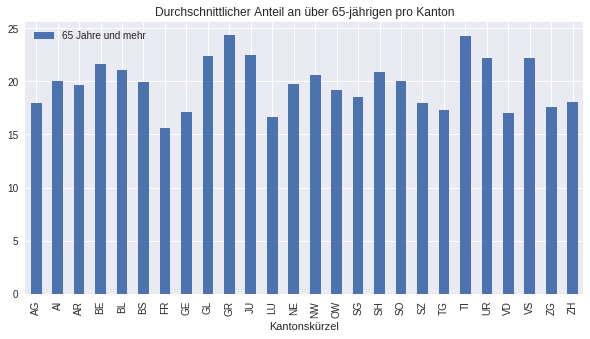

In [95]:
df_gemeinden.groupby(['Kantonskürzel']).mean()['65 Jahre und mehr'].to_frame().plot(kind='bar',figsize=(10,5))

plt.title('Durchschnittlicher Anteil an über 65-jährigen pro Kanton')
plt.show()